<a href="https://colab.research.google.com/github/anammagalhaes/Detec-o_cancer_mama_Machine_Learning/blob/main/DETEC%C3%87%C3%83O_DE_CANCER_DE_MAMA_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modelo de Classificação para Detecção de Câncer de Mama 

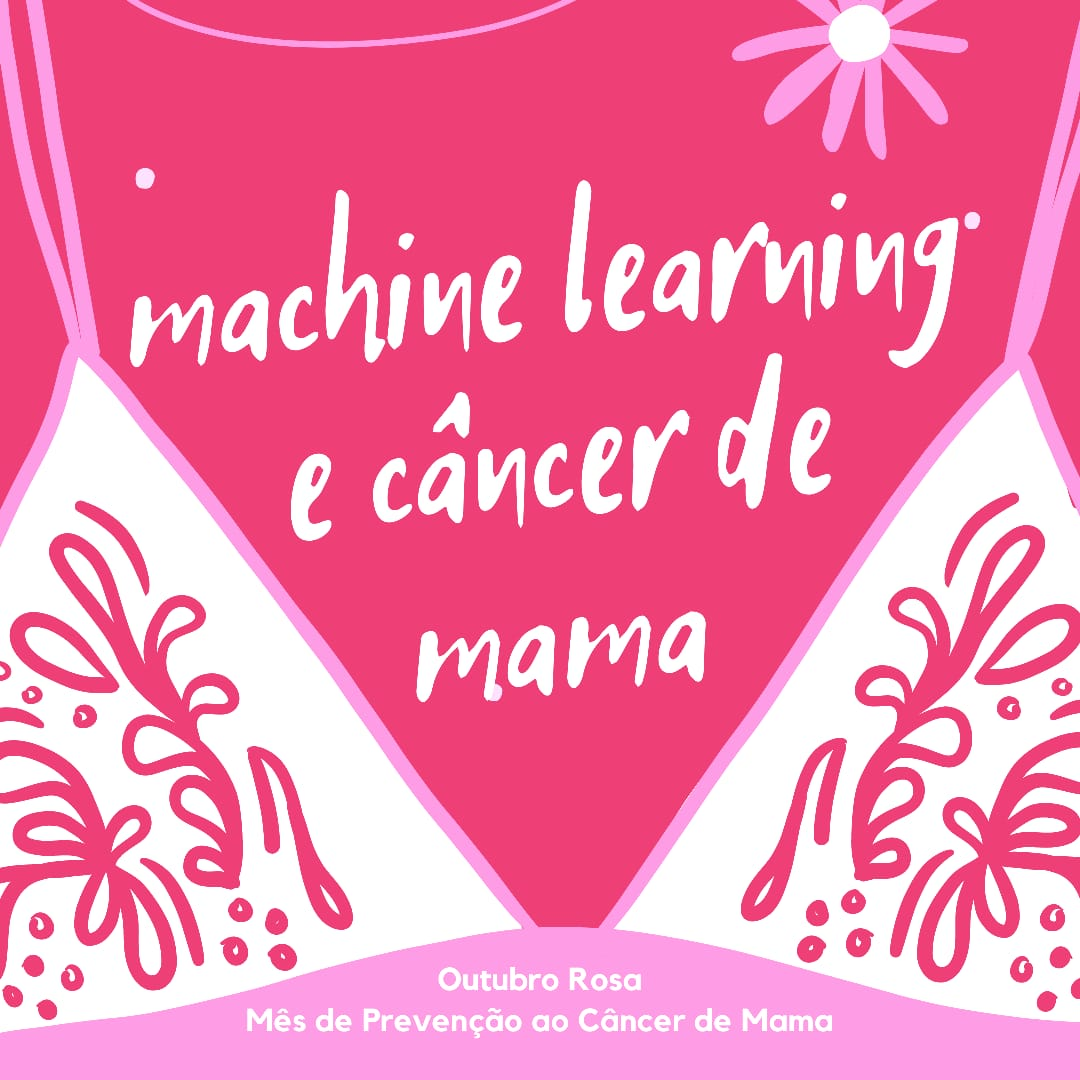

O emprego de técnicas de Machine Learning tem sido crescente na medicina. Na detecção do câncer de mama não seria diferente. Detectar o câncer precocemente aumenta as chances de cura e esse projeto tem como objetivo gerar um modelo que faça a classificação dos tumores em malignos (câncer) ou benignos. 

Este projeto tem ainda maior relevância no mês em que estamos. O mês de outubro, conhecido como Outubro Rosa traz um apelo para que as mulheres e também os homens realizem exames periódicos para prevenir e/ou detectar o câncer de mama. Neste ano, os dados do INCA (Instituto Nacional de Câncer) mostram que, aproximadamente 30% do total de neoplasias foi de câncer de mama em mulheres. Para homens, essa estatística é mais reduzida. 

Desta forma, trabalhos feitos nesse sentido aliam a tecnologia à medicina em prol da saúde humana. 

O banco de dados foi obtido de Diagnostic Wisconsin Breast Cancer Database [Diagnostic Wisconsin Breast Cancer Database](https://https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic), ou em [banco de dados](https://https://uc509f2780ce2a62e3b1f8b70d7a.dl.dropboxusercontent.com/cd/0/inline/BB0S4mZNN_Aq4YuaN-hNz5oE7hD_VUj27FhiYwEWp1TKAEsnCaUpocR_qDAbdTvqH107E2PZknhwxyeBxvZBTk_BRw3d3tVwoSkB_jQHw3t0NKQecLfyZiEv1To9mrX0cU4/file#). Logo abaixo, estarão as análises exploratórias e estatisticas para extrair informações do banco de dados. Posteriormente, a preparação dos dados e treinamento do modelo. 

Primeiramente serão realizadas análises nos dados que nos permitam perceber se há necessidade de limpeza ou tratamento dos dados para que o treinamento do modelo seja feito e que gere uma boa performance na classificação. 


In [ ]:
# Importando as bibliotecas necessárias: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [ ]:
# Importando o banco de dados para um DataFrame: 
data = ('https://uc509f2780ce2a62e3b1f8b70d7a.dl.dropboxusercontent.com/cd/0/inline/BB0S4mZNN_Aq4YuaN-hNz5oE7hD_VUj27FhiYwEWp1TKAEsnCaUpocR_qDAbdTvqH107E2PZknhwxyeBxvZBTk_BRw3d3tVwoSkB_jQHw3t0NKQecLfyZiEv1To9mrX0cU4/file#')
df = pd.read_csv(data)


## Análise Exploratória 

Para ter uma noção de como o banco de dados está disposto, é importante imprimir as cinco primeiras entradas (ou linhas), utilizando a função head da biblioteca pandas. Assim, podemos ver exemplos de entrada e formular hipóteses iniciais no processo investigativo dos dados. 

In [ ]:
# imprimindo as cinco primeiras entradas do banco de dados: 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A coluna ID representa o número de identificação do paciente. A coluna diagnosis é a variável categórica, que será a variável alvo do problema. Esta variável está representada por M de maligno e B de benigno. As demais variáveis (ou colunas) indicam caracteristicas do tumor. 

Sobre o formato, com exceção da coluna diagnosis, todas as outras são do tipo numérica (int e float). No entanto, mesmo com essa suposição, para ter certeza, isso pode ser analisado por meio do atributo dtypes e assim, pode-se ter certeza de que nenhuma foi importada como string. 

A função count, utilizada logo abaixo, contabiliza quantas entradas tem em cada variável.



In [ ]:
# observação do tipo das variáveis: 

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Pode-se visualizar que com excessão da ID e diagnosis, as outras são no formato float. 

In [ ]:
# contabilizando as entradas para cada variável 

df.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

A função shape também do Pandas permite obter a dimensão do DataFrame em variáveis e entradas. 

In [ ]:
# obter a dimensão do banco de dados em variáveis e entradas 

df.shape
print('\nDataFrame:')
print('\nNúmero de entradas :',df.shape[0])
print('\nNúmero de colunas :', df.shape[1])


DataFrame:

Número de entradas : 569

Número de colunas : 32


Assim, pode-se observar que este banco de dados é constituido por 32 colunas, ou seja, 32 variáveis e 569 entradas, linhas, que no caso, representam os pacientes. 

## Análise Estatística 

Como primeira etapa da análise estatística, é importante obter um reumo estatistico do banco de dados. 

In [ ]:
# Obtenção do resumo estatístico:

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


O resumo estatístico e as demais análises são importantes para, como em qualquer projeto de Data Science, a verificar a presença de valores ausentes no dataset. A presença, ou a grande quantidade de valores ausentes são um dos fatores que fazem decair a qualidade do banco de dados e também do modelo desenvolvido com base nesses dados. Abaixo, pode-se analisar como é o banco de dados nesse sentido.  

In [ ]:
# Verificação se há valores ausentes no dataset: 

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

A partir disso, pode-se verificar que não há valores ausentes neste dataset. 

Mesmo todos os valores sendo numéricos, a verificação da quantidade de valores únicos para cada variável é interessante, pois isso permite verificar se os números podem estar representando classes, por exemplo.

In [ ]:
# observação da existência de valores únicos

print("\nValores únicos:")
print(df.nunique().sort_values())


Valores únicos:
diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                    

Para o treinamento do modelo, é necessário verificar o balanceamento do dataset. Isso permite observar a porcentagem de valores da variável alvo em cada uma das categorias (M e B). Como se pode ver abaixo no gráfico de barras feito a partir da biblioteca matplotlib, existe um pequeno desbalanceamento de valores nas categorias, pois há maior quantidade de benignos (B) que de malignos (M).

Diagnósticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


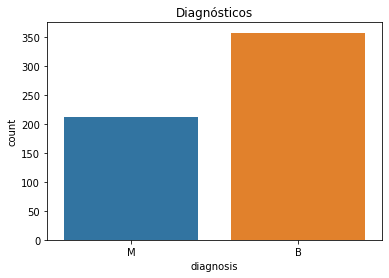

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# ver porcentagem dos diagnósticos
print("Diagnósticos:")
print(df.diagnosis.value_counts() / df.shape[0])  #ver como reduz casa decimal 

# plotar o gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=df, ax=ax)
ax.set_title("Diagnósticos")
plt.show() 

df.diagnosis.value_counts() # quanto tem de B e quanto tem de M 



Para ter a noção de como as variáveis estão distribuídas, plotar o histograma de todas as variáveis numéricas é uma boa opção. 

Observação: Os valores de algumas variáveis estão mais bem distribuídos em torno de uma média e outras tendem a puxar o histograma para a esquerda.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


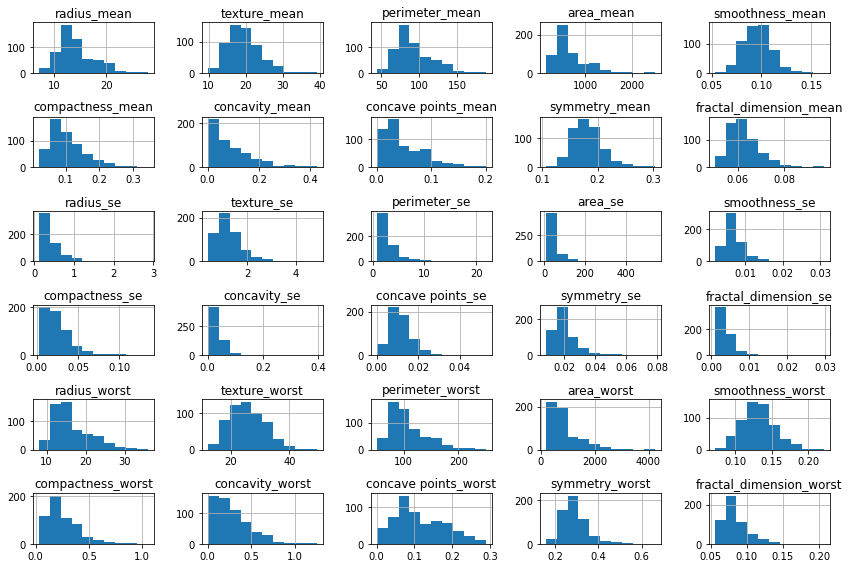

In [ ]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

Para ver a intensidade da correlação entre as variáveis, uma opção é plotar um heatmap. A maioria das variáveis possuem correlação positiva.

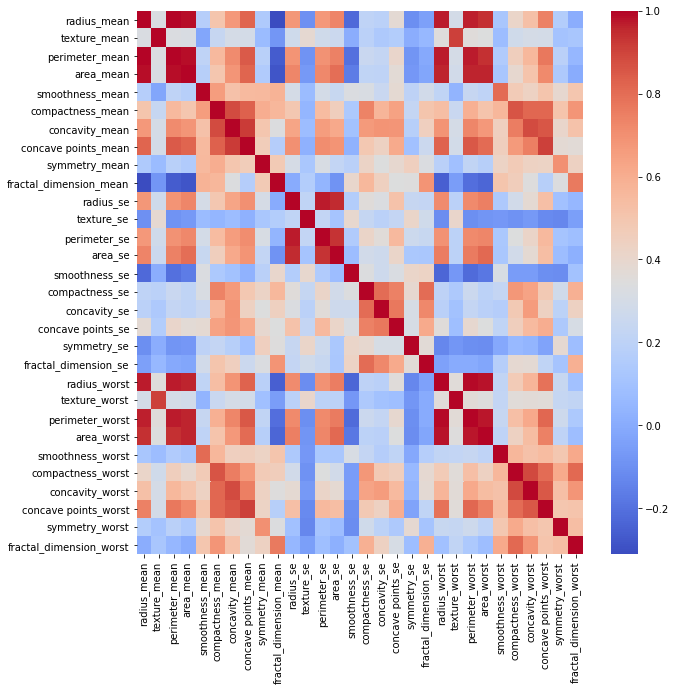

In [ ]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show()

Cada profissional julga necessárias as análises que pretende fazer. Neste caso, a partir destas, já foram obtidas informações relevantes sobre o banco de dados e também para definir como será a preparação para a construção do modelo. 

## Preparação dos dados para a construção do modelo preditivo. 

Como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, vou usar o StardardScaler, que vem junto com sklearn.preprocessing. Esta ferramenta é extremamente útil para padronizar os dados numéricos.

Usando LabelEncoder pode-se converter variáveis categóricas em numéricas e alimentar o modelo adequadamente, que é o que vai ser feito com as variáveis categóricas B e M deste banco de dados. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis', 'id'], axis=1) #AS VARIAVEIS INDEPENDENTES 
y = df['diagnosis']#ALVO QUE É CATEGORICA , A QUE EU VOU PREVER 

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y) #TRANSFORMA A VARIAVEL ALVO QUE ERA CATEGORICA EM NUMÉRICA 

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



Vale destacar que o cálculo utilizar por StandardScaler para calcular os scores é $z = \frac{x-u}{s}$, onde $u$ é a média das amostras do conjunto de treino e $s$ é o desvio padrão dessa amostra.

Por fim, antes de construir o modelo de fato, dividimos o dataset entre treino e teste usando o train_test_split, função que facilitar muito o trabalho, e que se encontra em sklearn.model_selection.


# Treinamento do modelo de Machine Learning para detecção de cancer de mama 

Será utilizado o algoritmo Random Forest. Este algoritmo é bastante usual, pois emprega métodos ensemble, e cria uma combinação de várias árvores de decisão - uma "floresta" realmente - verificando qual combinação apresenta melhor desempenho e acurácia. Além disso, Random Forest possui vantagens devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

Este problema de detecção de câncer consiste em classificar corretamente um tumor entre benigno e maligno, ou seja, é necessário que o modelo de Machine Learning dê uma classificação ao ser alimentado com diversas variáveis independentes (features).

Para tanto, será utilizada a biblioteca Scikit-Learn. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)

# treinando o modelo 
ml_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Desempenho do modelo de detecção de câncer de mama


É bom ter em mente que nem sempre uma excelente acurácia vai significar que seu modelo está bom. 
Por exemplo, quando se trata de detectar câncer, queremos maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos. No entanto, esta é uma balança difícil de equilibrar, e o trade-off pode ser bem subjetivo inclusive.

Aqui, além da métrica de acurácia o uso da função classification_report é útil para ver o desempenho do modelo sobre as métricas de precisão, recall, f1-score e support.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9473684210526315

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.96      0.92      0.94        72

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171





Aparentemente, o modelo está com ótimos valores nas métricas consideradas. No entanto, é importante gerar uma matriz de confusão. Para exemplificar, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

Há vezes em que é melhor ter mais falsos positivos e investigar mais profundamente o caso (como também é o caso de fraudes no cartão de crédito), e ter um modelo menos preciso.


In [ ]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,96,3
pos,6,66


Como você pode confirmar, o modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 96% e lidou muito bem com ambas as classes.

# Conclusão 

Como foi dito anteriormente, o modelo foi capaz de classificar com considerada acurácia ambas as classes e portanto, pode ser utilizado na detecção do tumor maligno indicado pela classe M e que representa, portanto um possivel câncer, ou pela classe B, que representa um tumor benigno. 

A preocupação com o câncer de mama não precisa, e nem pode, ser somente no mês de outubro. Deve ser durante todo o ano! Os avanços na tecnologia e, sobretudo na Inteligência Artificial, para detecção de doenças são bastante vantajosos para a medicina contribuindo com a melhoria do diagnóstico precoce e redução de tratamentos convencionais. 



Este projeto foi baseado em um trabalho da Sigmoidal, feito pelo Carlos Melo, professor do qual eu tive o prazer de ser aluna. 

Fiquem à vontade para editar, copiar e estudar com base neste projeto também! Qualquer dúvida, estou à disposição, inclusive! Abraço! 